# Case Studies on ZARA dataset

<b> About Dataset </b>

<b> Introduction: </b>
    
<font size ='3'> The Zara Clothing Collection dataset is a comprehensive collection of fashion items scraped from the renowned clothing brand Zara. This dataset focuses on both men's and women's clothing and is meticulously classified into various categories such as shirts, pants, trousers, shorts, and more. It serves as a valuable resource for fashion enthusiasts, researchers, and data analysts seeking insights into Zara's diverse product offerings. </font>

<b>Data Classification:</b>
    
The dataset is organized into several categories, each representing a specific type of clothing item. These categories may include but are not limited to:

<b>Shirts</b> : This category comprises various types of shirts such as    tshirts, dress shirts, blouses, and more, for both men and women.

<b>Pants and Trousers</b> : Items in this category encompass a wide range of lower body apparel, including jeans, trousers, slacks, and leggings.

<b>Shorts</b> : Shorts of different styles and designs for both men and women are grouped under this category.

<b>Dresses</b> : Women's dresses, including casual, formal, and eveningwear, are part of this category.

<b>Outerwear</b> : This category includes jackets, coats, blazers, and other outer garments suitable for different seasons and occasions.

<b>Accessories</b> : Some datasets may include accessories like belts, scarves, and hats to complement the clothing items.

url for kaggle dataset - https://www.kaggle.com/datasets/abhinavtyagi2708/zara-dataset-men-and-women-clothing

In the following notebook we have done 4 use cases:
    
<b> Use Case 1 : Price Analysis </b>
        
<b> Use Case 2 : Market Research Analysis </b>
        
<b> Use Case 3 : Sentiment Analysis </b>
        
<b> Use Case 4 : Recommender System </b>

Importing the neccessary libaries

In [75]:
import nltk
import glob
import os
import pandas as pd
import seaborn as sns
from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import zipfile

import warnings
ignore.filterwarnings('ignore')

Define paths for men's and women's clothing CSV files

In [179]:
# Initialize lists to store dataframes for men and women
men_dataframes = []
women_dataframes = []

# Specify the paths to your folders
men_csv_folder = "D:/projects for git/Projects for Resume/ZARA/Men"
women_csv_folder = "D:/projects for git/Projects for Resume/ZARA/Women"

# Load data for men's clothing
for csv_file in os.listdir(men_csv_folder):
    if csv_file.endswith(".csv"):
        men_dataframes.append(pd.read_csv(os.path.join(men_csv_folder, csv_file)))

# Load data for women's clothing
for csv_file in os.listdir(women_csv_folder):
    if csv_file.endswith(".csv"):
        women_dataframes.append(pd.read_csv(os.path.join(women_csv_folder, csv_file)))

# Concatenate dataframes for men and women
men_data = pd.concat(men_dataframes)
women_data = pd.concat(women_dataframes)

In [180]:
men_data

,Unnamed: 0,product_name,link,product_images,price,details
0,0,PACK OF 2 STRIPED POPLIN BOXERS,https://www.zara.com/in/en/pack-of-2-striped-p...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 1,990.00",Pack of 2 pairs of boxers made of poplin fabri...
1,3,PACK OF 2 STRIPED POPLIN BOXERS,https://www.zara.com/in/en/pack-of-2-striped-p...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 1,990.00",Pack of 2 pairs of boxers made of cotton popli...
2,5,2-PACK OF SHORT POPLIN BOXERS,https://www.zara.com/in/en/2-pack-of-short-pop...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 1,990.00",Pack of 2 pairs of short boxers made of cotton...
3,7,2-PACK OF BOXERS WITH CUTWORK EMBROIDERY,https://www.zara.com/in/en/2-pack-of-boxers-wi...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 2,590.00",Pack of 2 pairs of boxers made of poplin. Elas...
4,8,3-PACK OF BASIC BOXERS,https://www.zara.com/in/en/3-pack-of-basic-box...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 1,990.00",Pack of 3 pairs of boxers with an elastic wais...
...,...,...,...,...,...,...
7,8,REGULAR FIT JEANS,https://www.zara.com/in/en/regular-fit-jeans-p...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 4,990.00",Regular fit jeans made of cotton denim. Five p...
8,9,CHAMBRAY SHIRT,https://www.zara.com/in/en/chambray-shirt-p075...,[{'https://static.zara.net/photos///2023/I/0/1...,"₹ 5,990.00",Regular-fit spread collar shirt made of cotton...
9,10,STRIPED SHIRT,https://www.zara.com/in/en/striped-shirt-p0568...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 4,990.00",Regular fit shirt made of a cotton fabric. Spr...
10,13,100% LINEN SUIT TROUSERS,https://www.zara.com/in/en/100-linen-suit-trou...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 5,990.00",Straight fit trousers made of linen. Front poc...


In [181]:
women_data

,Unnamed: 0,Product_Name,Link,Product_Image,Price,Details
0,0,CHAIN LINK COIN NECKLACE,https://www.zara.com/in/en/chain-link-coin-nec...,[{'https://static.zara.net/photos///2023/I/0/1...,"₹ 1,890.00",Necklace featuring metal links in different si...
1,2,LEATHER BELT WITH SQUARE BUCKLE,https://www.zara.com/in/en/leather-belt-with-s...,[{'https://static.zara.net/photos///2023/I/0/1...,"₹ 2,590.00",Leather belt with a square buckle and loops li...
2,5,DENIM SASH BELT,https://www.zara.com/in/en/denim-sash-belt-p03...,[{'https://static.zara.net/photos///2023/I/0/1...,"₹ 2,290.00",Sash belt in denim fabric. Asymmetric waistban...
3,7,FLORAL NECK BOW,https://www.zara.com/in/en/floral-neck-bow-p00...,[{'https://static.zara.net/photos///2023/I/0/1...,₹ 990.00,Long bow with floral detail made of the same f...
4,8,DENIM SASH BELT WITH POCKETS,https://www.zara.com/in/en/denim-sash-belt-wit...,[{'https://static.zara.net/photos///2023/I/0/1...,"₹ 2,290.00",Sash belt in denim fabric with patch pockets.
...,...,...,...,...,...,...
172,248,CASHMERE KNIT SWEATER,https://www.zara.com/in/en/cashmere-knit-sweat...,[{'https://static.zara.net/photos///2023/I/0/1...,"₹ 10,990.00",Sweater made of a cashmere blend. Featuring a ...
173,249,SATIN BALLET FLATS WITH BOW DETAIL,https://www.zara.com/in/en/satin-ballet-flats-...,[{'https://static.zara.net/photos///2023/I/1/1...,"₹ 2,890.00",Satin ballet flats. Bow detail on the front. R...
174,250,OVERSIZED SHIRT,https://www.zara.com/in/en/oversized-shirt-p04...,[{'https://static.zara.net/photos///2023/I/0/1...,"₹ 2,590.00",Loose-fitting collared shirt featuring long sl...
175,251,TRF MOM FIT HIGH-WAIST JEANS,https://www.zara.com/in/en/trf-mom-fit-high-wa...,[{'https://static.zara.net/photos///2023/I/0/1...,"₹ 2,990.00",HIGH-WAIST - ANKLE LENGTHFaded high-waist jean...


Display basic information about the dataset

In [182]:
#Men
num_rows, num_columns = men_data.shape
print("The dataset comprises {} rows and {} columns.".format(num_rows, num_columns))


The dataset comprises 1478 rows and 6 columns.


In [183]:
#Women
num_rows, num_columns = women_data.shape
print("The dataset comprises {} rows and {} columns.".format(num_rows, num_columns))

The dataset comprises 2707 rows and 6 columns.


Check for missing values

In [184]:
men_data.isnull().sum()

Unnamed: 0         0
product_name       2
link               0
 product_images    0
price              2
details            3
dtype: int64

In [185]:
women_data.isnull().sum()

Unnamed: 0       0
Product_Name     3
Link             0
Product_Image    0
Price            0
Details          0
dtype: int64

In [186]:
men_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1478 entries, 0 to 11
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1478 non-null   int64 
 1   product_name     1476 non-null   object
 2   link             1478 non-null   object
 3    product_images  1478 non-null   object
 4   price            1476 non-null   object
 5   details          1475 non-null   object
dtypes: int64(1), object(5)
memory usage: 80.8+ KB


In [187]:
women_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2707 entries, 0 to 176
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     2707 non-null   int64 
 1   Product_Name   2704 non-null   object
 2   Link           2707 non-null   object
 3   Product_Image  2707 non-null   object
 4   Price          2707 non-null   object
 5   Details        2707 non-null   object
dtypes: int64(1), object(5)
memory usage: 148.0+ KB


# USE CASE 1 : Price Analysis

In [188]:
men_data

,Unnamed: 0,product_name,link,product_images,price,details
0,0,PACK OF 2 STRIPED POPLIN BOXERS,https://www.zara.com/in/en/pack-of-2-striped-p...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 1,990.00",Pack of 2 pairs of boxers made of poplin fabri...
1,3,PACK OF 2 STRIPED POPLIN BOXERS,https://www.zara.com/in/en/pack-of-2-striped-p...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 1,990.00",Pack of 2 pairs of boxers made of cotton popli...
2,5,2-PACK OF SHORT POPLIN BOXERS,https://www.zara.com/in/en/2-pack-of-short-pop...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 1,990.00",Pack of 2 pairs of short boxers made of cotton...
3,7,2-PACK OF BOXERS WITH CUTWORK EMBROIDERY,https://www.zara.com/in/en/2-pack-of-boxers-wi...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 2,590.00",Pack of 2 pairs of boxers made of poplin. Elas...
4,8,3-PACK OF BASIC BOXERS,https://www.zara.com/in/en/3-pack-of-basic-box...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 1,990.00",Pack of 3 pairs of boxers with an elastic wais...
...,...,...,...,...,...,...
7,8,REGULAR FIT JEANS,https://www.zara.com/in/en/regular-fit-jeans-p...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 4,990.00",Regular fit jeans made of cotton denim. Five p...
8,9,CHAMBRAY SHIRT,https://www.zara.com/in/en/chambray-shirt-p075...,[{'https://static.zara.net/photos///2023/I/0/1...,"₹ 5,990.00",Regular-fit spread collar shirt made of cotton...
9,10,STRIPED SHIRT,https://www.zara.com/in/en/striped-shirt-p0568...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 4,990.00",Regular fit shirt made of a cotton fabric. Spr...
10,13,100% LINEN SUIT TROUSERS,https://www.zara.com/in/en/100-linen-suit-trou...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 5,990.00",Straight fit trousers made of linen. Front poc...


In [189]:
women_data

,Unnamed: 0,Product_Name,Link,Product_Image,Price,Details
0,0,CHAIN LINK COIN NECKLACE,https://www.zara.com/in/en/chain-link-coin-nec...,[{'https://static.zara.net/photos///2023/I/0/1...,"₹ 1,890.00",Necklace featuring metal links in different si...
1,2,LEATHER BELT WITH SQUARE BUCKLE,https://www.zara.com/in/en/leather-belt-with-s...,[{'https://static.zara.net/photos///2023/I/0/1...,"₹ 2,590.00",Leather belt with a square buckle and loops li...
2,5,DENIM SASH BELT,https://www.zara.com/in/en/denim-sash-belt-p03...,[{'https://static.zara.net/photos///2023/I/0/1...,"₹ 2,290.00",Sash belt in denim fabric. Asymmetric waistban...
3,7,FLORAL NECK BOW,https://www.zara.com/in/en/floral-neck-bow-p00...,[{'https://static.zara.net/photos///2023/I/0/1...,₹ 990.00,Long bow with floral detail made of the same f...
4,8,DENIM SASH BELT WITH POCKETS,https://www.zara.com/in/en/denim-sash-belt-wit...,[{'https://static.zara.net/photos///2023/I/0/1...,"₹ 2,290.00",Sash belt in denim fabric with patch pockets.
...,...,...,...,...,...,...
172,248,CASHMERE KNIT SWEATER,https://www.zara.com/in/en/cashmere-knit-sweat...,[{'https://static.zara.net/photos///2023/I/0/1...,"₹ 10,990.00",Sweater made of a cashmere blend. Featuring a ...
173,249,SATIN BALLET FLATS WITH BOW DETAIL,https://www.zara.com/in/en/satin-ballet-flats-...,[{'https://static.zara.net/photos///2023/I/1/1...,"₹ 2,890.00",Satin ballet flats. Bow detail on the front. R...
174,250,OVERSIZED SHIRT,https://www.zara.com/in/en/oversized-shirt-p04...,[{'https://static.zara.net/photos///2023/I/0/1...,"₹ 2,590.00",Loose-fitting collared shirt featuring long sl...
175,251,TRF MOM FIT HIGH-WAIST JEANS,https://www.zara.com/in/en/trf-mom-fit-high-wa...,[{'https://static.zara.net/photos///2023/I/0/1...,"₹ 2,990.00",HIGH-WAIST - ANKLE LENGTHFaded high-waist jean...


In [190]:
print("Men's Data:")
print(men_data.head())

print("\n\nWomen's Data:")
print(women_data.head())

Men's Data:
   Unnamed: 0                              product_name  \
0           0           PACK OF 2 STRIPED POPLIN BOXERS   
1           3           PACK OF 2 STRIPED POPLIN BOXERS   
2           5             2-PACK OF SHORT POPLIN BOXERS   
3           7  2-PACK OF BOXERS WITH CUTWORK EMBROIDERY   
4           8                    3-PACK OF BASIC BOXERS   

                                                link  \
0  https://www.zara.com/in/en/pack-of-2-striped-p...   
1  https://www.zara.com/in/en/pack-of-2-striped-p...   
2  https://www.zara.com/in/en/2-pack-of-short-pop...   
3  https://www.zara.com/in/en/2-pack-of-boxers-wi...   
4  https://www.zara.com/in/en/3-pack-of-basic-box...   

                                      product_images       price  \
0  [{'https://static.zara.net/photos///2023/I/0/2...  ₹ 1,990.00   
1  [{'https://static.zara.net/photos///2023/I/0/2...  ₹ 1,990.00   
2  [{'https://static.zara.net/photos///2023/I/0/2...  ₹ 1,990.00   
3  [{'https://static.zar

#### Check for missing values

In [192]:
men_missing_values = men_data.isnull().sum()
women_missing_values = women_data.isnull().sum()

print(men_missing_values)
print(women_missing_values)

Unnamed: 0         0
product_name       2
link               0
 product_images    0
price              2
details            3
dtype: int64
Unnamed: 0       0
Product_Name     3
Link             0
Product_Image    0
Price            0
Details          0
dtype: int64


#### Drop rows with missing prices

In [193]:
men_data = men_data.dropna(subset=['price'])
women_data = women_data.dropna(subset=['Price'])

# Function to convert price columns to float, handling non-numeric values
def convert_to_float(column):
    try:
        return float(column.replace('₹', '').replace(',', ''))
    except (ValueError, AttributeError):
        return None

# Convert 'price' columns to float, handling non-numeric values
men_data['price'] = men_data['price'].apply(convert_to_float)
women_data['Price'] = women_data['Price'].apply(convert_to_float)

# Remove rows with non-numeric values
men_data = men_data.dropna(subset=['price'])
women_data = women_data.dropna(subset=['Price'])


C:\Users\heman\AppData\Local\Temp\ipykernel_21944\183636895.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_data['price'] = men_data['price'].apply(convert_to_float)


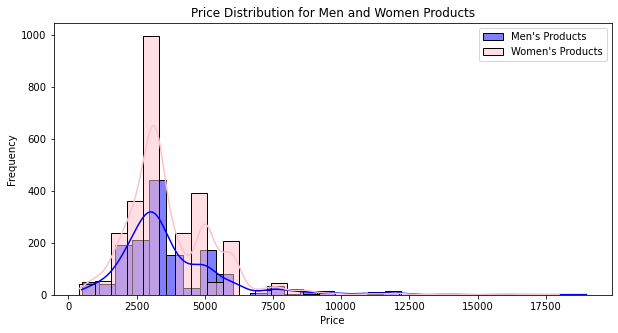

In [194]:
# Visualize price distribution for men's and women's products
plt.figure(figsize=(10, 5))
sns.histplot(men_data['price'], bins=30, color='blue', label="Men's Products", kde=True)
sns.histplot(women_data['Price'], bins=30, color='pink', label="Women's Products", kde=True)
plt.title('Price Distribution for Men and Women Products')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Caluculate some statistical Information

In [195]:
men_price_summary = men_data['price'].describe()
women_price_summary = women_data['Price'].describe()

print("Men's Price Summary:")
print(men_price_summary)

print("\nWomen's Price Summary:")
print(women_price_summary)

Men's Price Summary:
count     1476.000000
mean      3761.178862
std       2041.363710
min        490.000000
25%       2590.000000
50%       3290.000000
75%       4590.000000
max      18990.000000
Name: price, dtype: float64

Women's Price Summary:
count     2703.000000
mean      3722.992971
std       1724.918656
min        390.000000
25%       2590.000000
50%       3290.000000
75%       4990.000000
max      17990.000000
Name: Price, dtype: float64


In [198]:
women_data.rename(columns={'Price': 'price'}, inplace=True)

#### Compare price ranges between men's and women's products

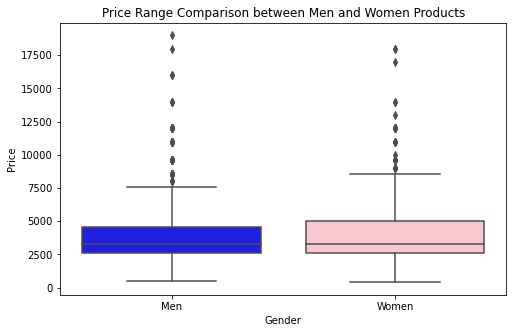

In [199]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='gender', y='price', 
            data=pd.concat([men_data.assign(gender='Men'), 
                            women_data.assign(gender='Women')]), 
            palette=['blue', 'pink'])
plt.title('Price Range Comparison between Men and Women Products')
plt.xlabel('Gender')
plt.ylabel('Price')
plt.show()


#### Conclusion

- Both Men and Women have similar price ranges 

# USE CASE 2 : Market Research

In [200]:
market_data = pd.concat([men_data, women_data], ignore_index=True)

In [201]:
market_data

,Unnamed: 0,product_name,link,product_images,price,details,Product_Name,Link,Product_Image,Details
0,0,PACK OF 2 STRIPED POPLIN BOXERS,https://www.zara.com/in/en/pack-of-2-striped-p...,[{'https://static.zara.net/photos///2023/I/0/2...,1990.0,Pack of 2 pairs of boxers made of poplin fabri...,NaN,NaN,NaN,NaN
1,3,PACK OF 2 STRIPED POPLIN BOXERS,https://www.zara.com/in/en/pack-of-2-striped-p...,[{'https://static.zara.net/photos///2023/I/0/2...,1990.0,Pack of 2 pairs of boxers made of cotton popli...,NaN,NaN,NaN,NaN
2,5,2-PACK OF SHORT POPLIN BOXERS,https://www.zara.com/in/en/2-pack-of-short-pop...,[{'https://static.zara.net/photos///2023/I/0/2...,1990.0,Pack of 2 pairs of short boxers made of cotton...,NaN,NaN,NaN,NaN
3,7,2-PACK OF BOXERS WITH CUTWORK EMBROIDERY,https://www.zara.com/in/en/2-pack-of-boxers-wi...,[{'https://static.zara.net/photos///2023/I/0/2...,2590.0,Pack of 2 pairs of boxers made of poplin. Elas...,NaN,NaN,NaN,NaN
4,8,3-PACK OF BASIC BOXERS,https://www.zara.com/in/en/3-pack-of-basic-box...,[{'https://static.zara.net/photos///2023/I/0/2...,1990.0,Pack of 3 pairs of boxers with an elastic wais...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4174,248,NaN,NaN,NaN,10990.0,NaN,CASHMERE KNIT SWEATER,https://www.zara.com/in/en/cashmere-knit-sweat...,[{'https://static.zara.net/photos///2023/I/0/1...,Sweater made of a cashmere blend. Featuring a ...
4175,249,NaN,NaN,NaN,2890.0,NaN,SATIN BALLET FLATS WITH BOW DETAIL,https://www.zara.com/in/en/satin-ballet-flats-...,[{'https://static.zara.net/photos///2023/I/1/1...,Satin ballet flats. Bow detail on the front. R...
4176,250,NaN,NaN,NaN,2590.0,NaN,OVERSIZED SHIRT,https://www.zara.com/in/en/oversized-shirt-p04...,[{'https://static.zara.net/photos///2023/I/0/1...,Loose-fitting collared shirt featuring long sl...
4177,251,NaN,NaN,NaN,2990.0,NaN,TRF MOM FIT HIGH-WAIST JEANS,https://www.zara.com/in/en/trf-mom-fit-high-wa...,[{'https://static.zara.net/photos///2023/I/0/1...,HIGH-WAIST - ANKLE LENGTHFaded high-waist jean...


#### Some insights about the dataset

In [202]:
print("Number of rows and columns:", market_data.shape)
print("\nColumn names:", market_data.columns)
print("\nData types:\n", market_data.dtypes)

Number of rows and columns: (4179, 10)

Column names: Index(['Unnamed: 0', 'product_name', 'link', ' product_images', 'price',
       'details', 'Product_Name', 'Link', 'Product_Image', 'Details'],
      dtype='object')

Data types:
 Unnamed: 0           int64
product_name        object
link                object
 product_images     object
price              float64
details             object
Product_Name        object
Link                object
Product_Image       object
Details             object
dtype: object


In [203]:
print("First few rows of the dataset:")
print(market_data.head())

First few rows of the dataset:
   Unnamed: 0                              product_name  \
0           0           PACK OF 2 STRIPED POPLIN BOXERS   
1           3           PACK OF 2 STRIPED POPLIN BOXERS   
2           5             2-PACK OF SHORT POPLIN BOXERS   
3           7  2-PACK OF BOXERS WITH CUTWORK EMBROIDERY   
4           8                    3-PACK OF BASIC BOXERS   

                                                link  \
0  https://www.zara.com/in/en/pack-of-2-striped-p...   
1  https://www.zara.com/in/en/pack-of-2-striped-p...   
2  https://www.zara.com/in/en/2-pack-of-short-pop...   
3  https://www.zara.com/in/en/2-pack-of-boxers-wi...   
4  https://www.zara.com/in/en/3-pack-of-basic-box...   

                                      product_images   price  \
0  [{'https://static.zara.net/photos///2023/I/0/2...  1990.0   
1  [{'https://static.zara.net/photos///2023/I/0/2...  1990.0   
2  [{'https://static.zara.net/photos///2023/I/0/2...  1990.0   
3  [{'https://static.

#### Check for missing values in each column

In [205]:
missing_values = market_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Unnamed: 0            0
product_name       2703
link               2703
 product_images    2703
price                 0
details            2704
Product_Name       1479
Link               1476
Product_Image      1476
Details            1476
dtype: int64


#### Unique values and their counts for categorical columns

In [206]:
unique_values_counts = market_data['product_name'].value_counts()
print("\nUnique values and their counts for 'product_name' column:")
print(unique_values_counts)


Unique values and their counts for 'product_name' column:
CONTRAST PRINTED T-SHIRT               11
100% LINEN SHIRT                        9
SLOGAN PRINT T-SHIRT                    9
GEOMETRIC PRINT SWIMMING TRUNKS         8
SEERSUCKER SWIMMING TRUNKS              7
                                       ..
TEXTURED LINEN - COTTON SHIRT           1
RIGID MINAUDIÈRE MINI CROSSBODY BAG     1
POINTELLE TEXTURED SHIRT                1
SLIM EMBOSSED CLUTCH                    1
REGULAR FIT JEANS                       1
Name: product_name, Length: 989, dtype: int64


#### Visualization of 'price' distribution using a histogram

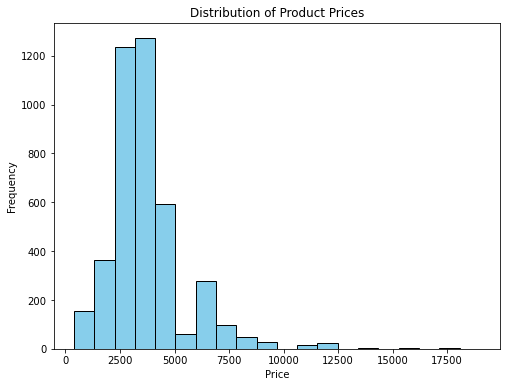

In [207]:
plt.figure(figsize=(8, 6))
plt.hist(market_data['price'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

#### Visualization of top 10 most frequent 'product_name' values using a bar chart

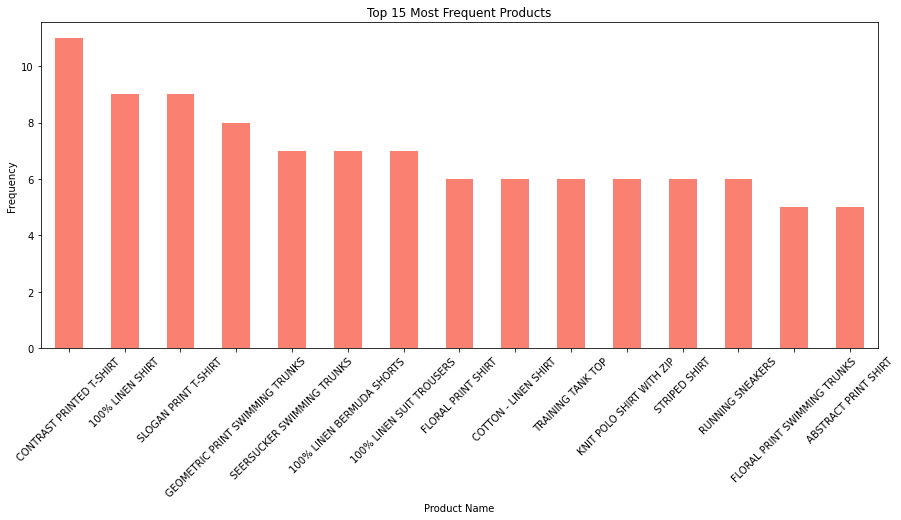

In [208]:
top_10_products = unique_values_counts.head(15)
plt.figure(figsize=(15, 6))
top_10_products.plot(kind='bar', color='salmon')
plt.title("Top 15 Most Frequent Products")
plt.xlabel("Product Name")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

#### Conclusion

- Above are the top 15 products which sales are high 

# USE CASE 3 : Sentiment Analysis

In [209]:
#Perform sentiment analysis on product descriptions

men_data['description_sentiment'] = men_data['details'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
women_data['description_sentiment'] = women_data['Details'].apply(lambda x : TextBlob(str(x)).sentiment.polarity)

In [210]:
men_data['description_sentiment']

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
        ...   
7     0.252381
8     0.269048
9     0.176786
10    0.380000
11    0.428571
Name: description_sentiment, Length: 1476, dtype: float64

In [211]:
women_data['description_sentiment']

0      0.000
1      0.000
2      0.000
3     -0.025
4      0.000
       ...  
172   -0.050
173    0.200
174   -0.025
175    0.650
176    0.150
Name: description_sentiment, Length: 2703, dtype: float64

Topic Modeling(LDA)

In [212]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#Replace Nan values in the 'deatils' column with empty
men_data['details'].fillna('', inplace = True)
women_data['Details'].fillna('', inplace = True)

#Vectorize the descriptions
vectorizer = CountVectorizer(max_df=0.95, min_df=10, stop_words='english')

men_descriptions = vectorizer.fit_transform(men_data['details'])
women_descriptions = vectorizer.fit_transform(women_data['Details'])


In [213]:
men_descriptions

<1476x309 sparse matrix of type '<class 'numpy.int64'>'
	with 20324 stored elements in Compressed Sparse Row format>

In [214]:
women_descriptions

<2703x388 sparse matrix of type '<class 'numpy.int64'>'
	with 32141 stored elements in Compressed Sparse Row format>

FitLDA Models

In [215]:
n_topics = 10

lda_men = LatentDirichletAllocation(n_components = n_topics, random_state = 42)
lda_women = LatentDirichletAllocation(n_components = n_topics, random_state = 42)

# Example
men_summer_products = men_data[men_data['details'].str.contains('summer', case=False)]
women_summer_products = women_data[women_data['Details'].str.contains('summer', case=False)]

# Filter men's and women's products for summer
men_summer_products = men_data[men_data['details'].str.contains('summer', case=False, na=False)]
women_summer_products = women_data[women_data['Details'].str.contains('summer', case=False, na=False)]

In [216]:
# Display the first few records in the subsets
print("Men's Summer Products:")
print(men_summer_products.head())

print("\nWomen's Summer Products:")
print(women_summer_products.head())


Men's Summer Products:
     Unnamed: 0                          product_name  \
117         295                   SOFT WOVEN TOTE BAG   
4             4  SEOUL + SEOUL SUMMER 100ML / 3.38 oz   

                                                  link  \
117  https://www.zara.com/in/en/soft-woven-tote-bag...   
4    https://www.zara.com/in/en/seoul-seoul-summer-...   

                                        product_images   price  \
117  [{'https://static.zara.net/photos///2023/I/1/2...  3990.0   
4    [{'https://static.zara.net/photos///2023/V/2/2...  1790.0   

                                               details  description_sentiment  
117  Tote bag. Soft construction in a combination o...               0.179167  
4    ZARA SEOUL 532-8 SINSA DONG GANGNAM-GU EDT 100...               0.216667  

Women's Summer Products:
    Unnamed: 0              Product_Name  \
14          19  HIBISCUS 90 ML / 3.04 oz   

                                                 Link  \
14  https://www.zar

Calculate sentiment for all descriptions in men's and women's products

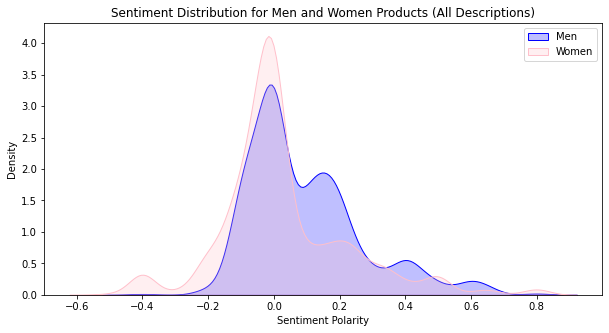

In [217]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

all_men_descriptions = men_data['details'].str.cat(sep=' ')
all_women_descriptions = women_data['Details'].str.cat(sep=' ')

def calculate_sentiment(text):
    try:
        sentiment = TextBlob(text).sentiment.polarity
        return sentiment
    except:
        return 0.0
    
men_data['description_sentiment'] = men_data['details'].apply(calculate_sentiment)
women_data['description_sentiment'] = women_data['Details'].apply(calculate_sentiment)

# Sentiment distribution for all descriptions
plt.figure(figsize=(10, 5))
sns.kdeplot(men_data['description_sentiment'], color='blue', label='Men', fill=True)
sns.kdeplot(women_data['description_sentiment'], color='pink', label='Women', fill=True)
plt.title('Sentiment Distribution for Men and Women Products (All Descriptions)')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()


In [218]:
# Concatenate all product descriptions in men's and women's data

all_men_descriptions = men_data['details'].str.cat(sep=' ')
all_women_descriptions = women_data['Details'].str.cat(sep=' ')

Generate word cloud for men's descriptions

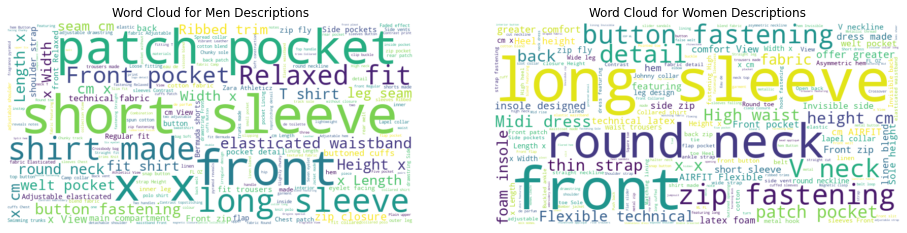

In [221]:
wordcloud_men = WordCloud(width=800, height=400, 
background_color='white').generate(all_men_descriptions)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_men, interpolation='bilinear')
plt.title("Word Cloud for Men Descriptions")
plt.axis('off')

# Generate word cloud for women's descriptions
wordcloud_women = WordCloud(width=800, height=400, 
background_color='white').generate(all_women_descriptions)
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_women, interpolation='bilinear')
plt.title("Word Cloud for Women Descriptions")
plt.axis('off')

plt.show()

Extract word frequencies from the word clouds

In [222]:
men_word_frequencies = wordcloud_men.words_
women_word_frequencies = wordcloud_women.words_

# Get the top 10 words for men and women
top_10_men_words = list(men_word_frequencies.keys())[:10]
top_10_women_words = list(women_word_frequencies.keys())[:10]

Print the top 10 words for men and women

In [223]:
print("Top 10 Words for Men:")
print(top_10_men_words)

print("\nTop 10 Words for Women:")
print(top_10_women_words)

Top 10 Words for Men:
['short sleeve', 'front', 'patch pocket', 'x x', 'long sleeve', 'shirt made', 'Relaxed fit', 'Front pocket', 'elasticated waistband', 'button fastening']

Top 10 Words for Women:
['long sleeve', 'front', 'round neck', 'zip fastening', 'button fastening', 'V neck', 'detail', 'patch pocket', 'High waist', 'Midi dress']


Function to calculate sentiment polarity

In [224]:
def calculate_sentiment(text):
    try:
        # Convert non-string data to an empty string
        text = str(text) if text is not None else ""
        sentiment = TextBlob(text).sentiment.polarity
        return sentiment
    except Exception as e:
        print(f"Error calculating sentiment: {e}")
        return None


In [225]:
men_directory = "D:/projects for git/Projects for Resume/ZARA/Men"
women_directory = "D:/projects for git/Projects for Resume/ZARA/Women"

men_csv_files = [os.path.join(men_directory, file) for file in os.listdir(men_directory) if file.endswith('.csv')]
women_csv_files = [os.path.join(women_directory, file) for file in os.listdir(women_directory) if file.endswith('.csv')]

# Read all CSV files for men and women into DataFrames
men_data = pd.concat([pd.read_csv(file) for file in men_csv_files])
women_data = pd.concat([pd.read_csv(file) for file in women_csv_files])

# Calculate sentiment for men's and women's product descriptions
men_data['description_sentiment'] = men_data['details'].apply(calculate_sentiment)
women_data['description_sentiment'] = women_data['Details'].apply(calculate_sentiment)


Sentiment Distribution for Men and Women Products

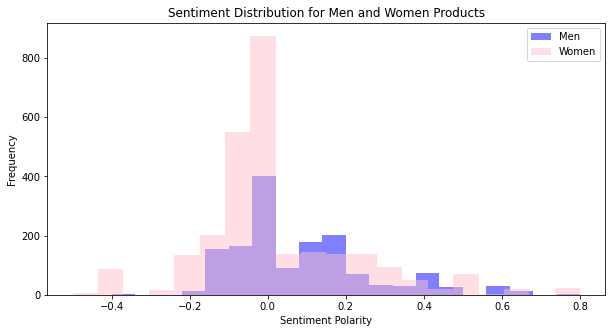

In [226]:
# Plot sentiment distribution for men's and women's products
plt.figure(figsize=(10, 5))
plt.hist(men_data['description_sentiment'], bins=20, alpha=0.5, color='blue', label='Men')
plt.hist(women_data['description_sentiment'], bins=20, alpha=0.5, color='pink', label='Women')
plt.title('Sentiment Distribution for Men and Women Products')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

In [227]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# Function to calculate sentiment
def calculate_sentiment(text):
    
    if isinstance(text, str):
        sentiment = analyzer.polarity_scores(text)
        compound_score = sentiment['compound']
        
        if compound_score >= 0.05:
            return "Positive"
        elif compound_score <= -0.05:
            return "Negative"
        else:
            return "Neutral"
    else:
        return "Neutral"
        
all_men_data = pd.DataFrame()
all_women_data = pd.DataFrame()

for csv_file in men_csv_files:
    men_data = pd.read_csv(csv_file)
    all_men_data = pd.concat([all_men_data, men_data])
for csv_file in women_csv_files:
    women_data = pd.read_csv(csv_file)
    all_women_data = pd.concat([all_women_data, women_data])


Apply sentiment analysis to the concatenated descriptions

In [228]:
all_men_data['description_sentiment'] = all_men_data['details'].fillna('').apply(calculate_sentiment)

all_women_data['description_sentiment'] = all_women_data['Details'].fillna('').apply(calculate_sentiment)

Count the number of descriptions in each sentiment category

In [229]:
men_sentiment_counts = all_men_data['description_sentiment'].value_counts()

women_sentiment_counts = all_women_data['description_sentiment'].value_counts()

The sentiment distribution for men and women

In [230]:
print("Sentiment Distribution for Men's Products:")
print(men_sentiment_counts)

print("\nSentiment Distribution for Women's Products:")
print(women_sentiment_counts)

Sentiment Distribution for Men's Products:
Neutral     939
Positive    486
Negative     53
Name: description_sentiment, dtype: int64

Sentiment Distribution for Women's Products:
Neutral     1957
Positive     633
Negative     117
Name: description_sentiment, dtype: int64


Sentiment Distribution for Men and Women Products

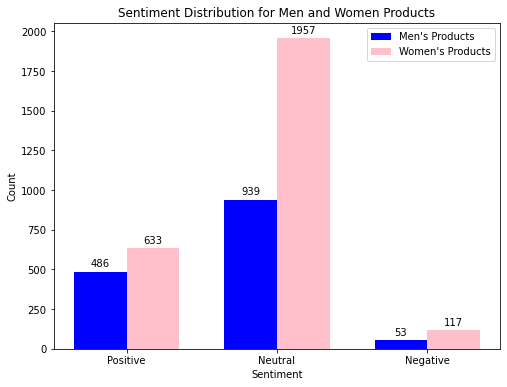

In [231]:
# Sentiment distribution data
sentiments = ['Positive', 'Neutral', 'Negative']

men_counts = [men_sentiment_counts.get(sentiment, 0) for sentiment in sentiments]
women_counts = [women_sentiment_counts.get(sentiment, 0) for sentiment in sentiments]

# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.35
x = range(len(sentiments))

bar1 = ax.bar(x, men_counts, width, label="Men's Products", color='blue')
bar2 = ax.bar([i + width for i in x], women_counts, width, label="Women's Products", color='pink')

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Sentiment Distribution for Men and Women Products')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(sentiments)
ax.legend()

# Add data labels above each bar
for bar in [bar1, bar2]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate('{}'.format(height), 
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), # 3 points vertical offset
                    textcoords="offset points", ha='center', va='bottom')
plt.show()


#### Conclusion

- Most of have neutral sentiment over the products and positive sentiment. 

- Very less have negative sentiment.

- Overall, ZARA has good relation in the customers

# USE CASE 4 : Recommender System

In [136]:
men_data.head()

,Unnamed: 0,product_name,link,product_images,price,details
0,0,PACK OF 2 STRIPED POPLIN BOXERS,https://www.zara.com/in/en/pack-of-2-striped-p...,[{'https://static.zara.net/photos///2023/I/0/2...,23.88,Pack of 2 pairs of boxers made of poplin fabri...
1,3,PACK OF 2 STRIPED POPLIN BOXERS,https://www.zara.com/in/en/pack-of-2-striped-p...,[{'https://static.zara.net/photos///2023/I/0/2...,23.88,Pack of 2 pairs of boxers made of cotton popli...
2,5,2-PACK OF SHORT POPLIN BOXERS,https://www.zara.com/in/en/2-pack-of-short-pop...,[{'https://static.zara.net/photos///2023/I/0/2...,23.88,Pack of 2 pairs of short boxers made of cotton...
3,7,2-PACK OF BOXERS WITH CUTWORK EMBROIDERY,https://www.zara.com/in/en/2-pack-of-boxers-wi...,[{'https://static.zara.net/photos///2023/I/0/2...,31.08,Pack of 2 pairs of boxers made of poplin. Elas...
4,8,3-PACK OF BASIC BOXERS,https://www.zara.com/in/en/3-pack-of-basic-box...,[{'https://static.zara.net/photos///2023/I/0/2...,23.88,Pack of 3 pairs of boxers with an elastic wais...


In [137]:
women_data.head()

,Unnamed: 0,Product_Name,Link,Product_Image,price,Details
0,0,CHAIN LINK COIN NECKLACE,https://www.zara.com/in/en/chain-link-coin-nec...,[{'https://static.zara.net/photos///2023/I/0/1...,22.68,Necklace featuring metal links in different si...
1,2,LEATHER BELT WITH SQUARE BUCKLE,https://www.zara.com/in/en/leather-belt-with-s...,[{'https://static.zara.net/photos///2023/I/0/1...,31.08,Leather belt with a square buckle and loops li...
2,5,DENIM SASH BELT,https://www.zara.com/in/en/denim-sash-belt-p03...,[{'https://static.zara.net/photos///2023/I/0/1...,27.48,Sash belt in denim fabric. Asymmetric waistban...
3,7,FLORAL NECK BOW,https://www.zara.com/in/en/floral-neck-bow-p00...,[{'https://static.zara.net/photos///2023/I/0/1...,11.88,Long bow with floral detail made of the same f...
4,8,DENIM SASH BELT WITH POCKETS,https://www.zara.com/in/en/denim-sash-belt-wit...,[{'https://static.zara.net/photos///2023/I/0/1...,27.48,Sash belt in denim fabric with patch pockets.


In [232]:
women_data.rename(columns={'Product_Name': 'product_name'}, inplace=True)
women_data.rename(columns={'Details': 'details'}, inplace=True)
combined_data = pd.concat([men_data, women_data])
combined_data.head

<bound method NDFrame.head of      Unnamed: 0                                    product_name  \
0             0                          100% LINEN SUIT BLAZER   
1             1                             JACKET WITH POCKETS   
2             2                     100% LINEN PLEATED TROUSERS   
3             3                          KNIT COTTON POLO SHIRT   
4             5                                    OXFORD SHIRT   
..          ...                                             ...   
172         248                           CASHMERE KNIT SWEATER   
173         249              SATIN BALLET FLATS WITH BOW DETAIL   
174         250                                 OVERSIZED SHIRT   
175         251                    TRF MOM FIT HIGH-WAIST JEANS   
176         253  OVERSIZE WATER-REPELLENT TRENCH COAT WITH BELT   

                                                  link  \
0    https://www.zara.com/in/en/100-linen-suit-blaz...   
1    https://www.zara.com/in/en/jacket-with-pocke

Drop duplicate product descriptions

In [233]:
combined_data.drop_duplicates(subset='product_name', keep='first', inplace=True)

Handle missing values if necessary

In [234]:
combined_data.dropna(subset=['product_name'], inplace=True)

#### Reset the index

In [235]:
combined_data.reset_index(drop=True, inplace=True)
print(combined_data.head())

   Unnamed: 0                 product_name  \
0           0       100% LINEN SUIT BLAZER   
1           1          JACKET WITH POCKETS   
2           2  100% LINEN PLEATED TROUSERS   
3           3       KNIT COTTON POLO SHIRT   
4           5                 OXFORD SHIRT   

                                                link  \
0  https://www.zara.com/in/en/100-linen-suit-blaz...   
1  https://www.zara.com/in/en/jacket-with-pockets...   
2  https://www.zara.com/in/en/100-linen-pleated-t...   
3  https://www.zara.com/in/en/knit-cotton-polo-sh...   
4  https://www.zara.com/in/en/oxford-shirt-p07545...   

                                      product_images        price  \
0  [{'https://static.zara.net/photos///2023/I/0/2...  ₹ 11,990.00   
1  [{'https://static.zara.net/photos///2023/I/0/2...   ₹ 7,590.00   
2  [{'https://static.zara.net/photos///2023/I/0/2...   ₹ 5,990.00   
3  [{'https://static.zara.net/photos///2023/I/0/2...   ₹ 3,290.00   
4  [{'https://static.zara.net/photos///20

#### Feature Extraction

In [236]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the descriptions
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_data['product_name'])

# Print the shape of the TF-IDF matrix
print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")


TF-IDF Matrix Shape: (178, 214)


#### Building the Recommendation System

In [237]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between products
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Print the shape of the cosine similarity matrix
print(f"Cosine Similarity Matrix Shape: {cosine_sim.shape}")


Cosine Similarity Matrix Shape: (178, 178)


#### Recommendation Function

In [238]:
#unique product names in the dataset
unique_product_names = combined_data['product_name'].unique()
for product_name in unique_product_names:
    print(product_name)


100% LINEN SUIT BLAZER
JACKET WITH POCKETS
100% LINEN PLEATED TROUSERS
KNIT COTTON POLO SHIRT
OXFORD SHIRT
SHORT SLEEVE HEAVY WEIGHT T-SHIRT
COTTON POPLIN SHIRT
REGULAR FIT JEANS
CHAMBRAY SHIRT
STRIPED SHIRT
100% LINEN SUIT TROUSERS
RECTANGULAR SUNGLASSES
OVERSIZE TRENCH COAT WITH POCKETS
KNIT SWEATER WITH ZIP
ZW MARINE STRAIGHT FIT HIGH-WAIST POCKET JEANS
CROSSBODY BAG
ZW MARINE STRAIGHT-LEG HIGH-WAIST JEANS
STRIPED COTTON T-SHIRT
CASHMERE KNIT SWEATER
WOOL BLEND BOXY-FIT KNIT SWEATER
CROPPED KNIT SWEATER
OPEN KNIT POLO SWEATER
BASIC KNIT SWEATER
WATER AND WIND PROTECTION RUBBERISED RAINCOAT
BASIC STRIPED JACKET
BELTED CHINO TROUSERS
TOTE WITH INTERIOR BAG
BALLET FLATS WITH BUCKLES
CARROT FIT TROUSERS WITH DARTS DETAIL
STRIPED OVERSIZE SHIRT
100% WOOL KNIT CARDIGAN
100% WOOL KNIT SWEATER
LEATHER BELT
ZW STRAIGHT-LEG MID-RISE CROPPED JEANS
LINEN COAT WITH VENTS - LIMITED EDITION
OPEN BACK HALTER WAISTCOAT
LONG SATIN SKIRT - LIMITED EDITION
FLAT LEATHER CAGE SANDALS
MAXI BOMBER JACKET W

In [239]:
def recommend_products(product_description, cosine_sim_matrix, data, top_n=5):
    try:
        # Find the index of the product in the dataset
        idx = data[data['product_name'] == product_description].index[0]

        # Get the pairwise similarity scores for the product
        sim_scores = list(enumerate(cosine_sim_matrix[idx]))

        # Sort the products based on similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the top-n most similar products
        sim_scores = sim_scores[1:top_n+1]

        # Get the product indices
        product_indices = [i[0] for i in sim_scores]

        # Get the recommended product names
        recommended_products = data['product_name'].iloc[product_indices]

        # Return the recommended products as a list
        return recommended_products.tolist()
    except IndexError:
        # Handle the case where the product name is not found
        return ["Product not found in the dataset"]

# Iterate through all unique product names and get recommendations
unique_product_names = combined_data['product_name'].unique()
for product_name in unique_product_names:
    recommended_products = recommend_products(product_name, cosine_sim, combined_data)
    
    # Print the product and its recommended products
    print(f"Product: {product_name}")
    print("Recommended Products:")
    for product in recommended_products:
        print(product)
    print("\n")


Product: 100% LINEN SUIT BLAZER
Recommended Products:
100% LINEN SUIT TROUSERS
100% LINEN PLEATED TROUSERS
SUIT-EFFECT JUMPSUIT
STRAIGHT BLAZER
BASIC BLAZER


Product: JACKET WITH POCKETS
Recommended Products:
PADDED JACKET WITH POCKETS
MAXI BOMBER JACKET WITH POCKETS
STRAIGHT BLAZER WITH POCKETS
OVERSIZE TRENCH COAT WITH POCKETS
TEXTURED BLAZER WITH PATCH POCKETS


Product: 100% LINEN PLEATED TROUSERS
Recommended Products:
100% LINEN SUIT TROUSERS
100% LINEN SUIT BLAZER
LINEN PALAZZO TROUSERS
PLEATED HIGH-WAIST BERMUDA SHORTS
LINEN-BLEND FLARED TROUSERS


Product: KNIT COTTON POLO SHIRT
Recommended Products:
STRIPED COTTON T-SHIRT
COTTON POPLIN SHIRT
OPEN KNIT POLO SWEATER
100% WOOL KNIT POLO SWEATER
COTTON BLEND OXFORD SHIRT


Product: OXFORD SHIRT
Recommended Products:
COTTON BLEND OXFORD SHIRT
STRIPED SHIRT
POPLIN SHIRT
BASIC T-SHIRT
SATIN SHIRT


Product: SHORT SLEEVE HEAVY WEIGHT T-SHIRT
Recommended Products:
LAPELLESS SHORT BLAZER
SHORT DOUBLE-BREASTED TRENCH COAT
STRIPED SHIRT


Product: WATER-REPELLENT TRENCH COAT
Recommended Products:
OVERSIZE WATER-REPELLENT TRENCH COAT WITH BELT
FLOWING TRENCH COAT
OVERSIZE TRENCH COAT WITH POCKETS
FLOWING FRAYED TRENCH COAT
WATER-REPELLENT PUFFER GILET WITH WIND PROTECTION


Product: PAPERBAG TROUSERS WITH BELT
Recommended Products:
MIDI SKIRT WITH BELT
LEATHER BELT
TEXTURED MIDI DRESS WITH BELT
SHAWL COLLAR BLAZER WITH BELT
OVERSIZE WATER-REPELLENT TRENCH COAT WITH BELT


Product: FLOWING FRAYED TRENCH COAT
Recommended Products:
FLOWING TRENCH COAT
OVERSIZE TRENCH COAT WITH POCKETS
WATER-REPELLENT TRENCH COAT
SHORT DOUBLE-BREASTED TRENCH COAT
OVERSIZE WATER-REPELLENT TRENCH COAT WITH BELT


Product: RELAXED FIT LINEN BLAZER - LIMITED EDITION
Recommended Products:
LINEN COAT WITH VENTS - LIMITED EDITION
LONG SATIN SKIRT - LIMITED EDITION
100% LINEN SUIT BLAZER
STRAIGHT BLAZER
BASIC BLAZER


Product: LINEN SHIRT DRESS
Recommended Products:
MIDI DRESS
MATCHING POPLIN DRESS
FITTED V-NECK MIDI DRESS
TEXTURED MIDI DRESS WITH B

Product: CROPPED LINEN BLEND WAISTCOAT
Recommended Products:
LINEN BLEND WAISTCOAT
LINEN BLEND CROPPED JACKET
LINEN BLEND OVERSIZE WAISTCOAT
CROPPED TAILORED WAISTCOAT
LINEN-BLEND FLARED TROUSERS


Product: LINEN BLEND MIDI SKIRT
Recommended Products:
KNIT MIDI SKIRT
MIDI SKIRT WITH BELT
LINEN WRAP SKIRT
LINEN BLEND WAISTCOAT
LINEN BLEND OVERSIZE WAISTCOAT


Product: STRAIGHT BLAZER WITH POCKETS
Recommended Products:
STRAIGHT BLAZER
TEXTURED BLAZER WITH PATCH POCKETS
JACKET WITH POCKETS
PADDED JACKET WITH POCKETS
OVERSIZE TRENCH COAT WITH POCKETS


Product: CASUAL STRAIGHT-LEG TROUSERS
Recommended Products:
STRAIGHT FIT TROUSERS
STRAIGHT-LEG TROUSERS WITH TURN-UP HEMS
STRAIGHT FIT KNIT TROUSERS
WIDE-LEG POPLIN TROUSERS
HIGH-WAIST WIDE-LEG TROUSERS


Product: METALLIC CROCHET BALLET FLATS
Recommended Products:
BALLET FLATS WITH BUCKLES
SATIN BALLET FLATS WITH BOW DETAIL
BALLET FLATS WITH SQUARE TOE AND BUCKLE
BALLET FLATS WITH BOW AND SQUARE TOE
100% LINEN SUIT BLAZER


Product: FLOWING

Function to get product recommendations

In [243]:
def get_recommendations(product_description, cosine_sim_matrix, data, top_n=5):
    try:
        # Find the index of the product in the dataset
        idx = data[data['product_name'] == product_description].index[0]

        # Get the pairwise similarity scores for the product
        sim_scores = list(enumerate(cosine_sim_matrix[idx]))

        # Sort the products based on similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the top-n most similar products
        sim_scores = sim_scores[1:top_n + 1]

        # Get the product indices
        product_indices = [i[0] for i in sim_scores]

        # Get the recommended product names
        recommended_products = data['product_name'].iloc[product_indices]

        # Create a DataFrame to display recommendations
        recommendations_df = pd.DataFrame({'Recommended Products': recommended_products})

        return recommendations_df
    except IndexError:
        
        return pd.DataFrame({'Recommended Products': ["Product not found in the dataset"]})

# Example usage:
product_description = "100% LINEN SUIT BLAZER" 
recommended_products_df = get_recommendations(product_description, cosine_sim, combined_data)
recommended_products_df.reset_index(drop=True, inplace=True)
print("Recommended Products:")
print(recommended_products_df)


Recommended Products:
          Recommended Products
0     100% LINEN SUIT TROUSERS
1  100% LINEN PLEATED TROUSERS
2         SUIT-EFFECT JUMPSUIT
3              STRAIGHT BLAZER
4                 BASIC BLAZER


#### Function to get product recommendations as a list

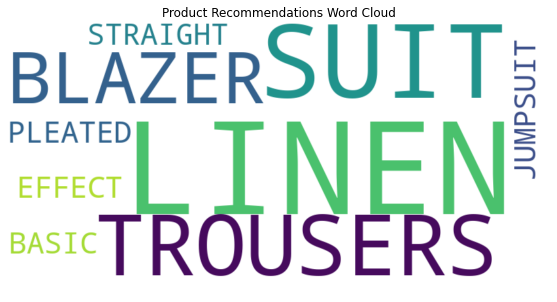

In [244]:
def get_recommendations_list(product_description, cosine_sim_matrix, data, top_n=5):
    try:
        # Find the index of the product in the dataset
        idx = data[data['product_name'] == product_description].index[0]

        # Get the pairwise similarity scores for the product
        sim_scores = list(enumerate(cosine_sim_matrix[idx]))

        # Sort the products based on similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the top-n most similar products
        sim_scores = sim_scores[1:top_n + 1]

        # Get the product indices
        product_indices = [i[0] for i in sim_scores]

        # Get the recommended product names as a list
        recommended_products = data['product_name'].iloc[product_indices].tolist()

        return recommended_products
    except IndexError:
       
        return ["Product not found in the dataset"]

# Example usage:
product_description = "100% LINEN SUIT BLAZER" 
recommended_products_list = get_recommendations_list(product_description, cosine_sim, combined_data)

# Combine the recommended products into a single string
recommended_products_text = " ".join(recommended_products_list)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(recommended_products_text)


plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Product Recommendations Word Cloud")
plt.show()
